In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [5]:
dataset = pd.read_csv("Train.csv")

In [6]:
dataset.shape

(40000, 2)

In [7]:
dataset.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [8]:
dataset['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [9]:
le = LabelEncoder()

In [10]:
y = np.array(dataset['label'])

In [11]:
y

array(['pos', 'pos', 'pos', ..., 'neg', 'pos', 'pos'], dtype=object)

In [12]:
y = le.fit_transform(y)

In [13]:
dataset['review'][1]

'http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.'

In [14]:
sw = set(stopwords.words('english'))

In [15]:
ps = PorterStemmer()

In [16]:
ps.stem('jumping') #convert word to its root word

'jump'

In [17]:
#preprocessing

def data_cleaning(sample):
    sample = sample.lower()  #convert all characters to lower case
    sample.replace("<br /><br />", "") #removing unnecessary html tags
    sample = re.sub("[^a-zA-Z]+", " ", sample) #removing non alphabetic characters
    
    sample = sample.split() #splitting sample based on space
    
    sample = [ps.stem(s) for s in sample if s not in sw] #removing stop words
    
    sample = " ".join(sample) #join all elements all sample list by space
    
    return sample
    

In [18]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [19]:
data_cleaning(dataset['review'][1])

'http video googl com videoplay docid hl en distribut tri br br opt mass appeal br br want best possibl view rang forgo profit continu manual labor job gladli entertain work br br view texa tale pleas write like like alex like stuie texa texa tale write br br opinion rule'

In [20]:
dataset['clean_review'] = dataset['review'].apply(data_cleaning) #preprocessing all reviews

In [21]:
dataset.head()

,review,label,clean_review
0,mature intelligent and highly charged melodram...,pos,matur intellig highli charg melodrama unbelive...
1,http://video.google.com/videoplay?docid=211772...,pos,http video googl com videoplay docid hl en dis...
2,Title: Opera (1987) Director: Dario Argento Ca...,pos,titl opera director dario argento cast cristin...
3,I think a lot of people just wrote this off as...,pos,think lot peopl wrote anoth one tom cruis weir...
4,This is a story of two dogs and a cat looking ...,pos,stori two dog cat look way back home old wise ...


In [22]:
dataset['clean_review']  #in pandas series

0        matur intellig highli charg melodrama unbelive...
1        http video googl com videoplay docid hl en dis...
2        titl opera director dario argento cast cristin...
3        think lot peopl wrote anoth one tom cruis weir...
4        stori two dog cat look way back home old wise ...
                               ...                        
39995    similar ray lawrenc jindabyn last movi lantana...
39996    starter met director go ww enact period movi c...
39997    much dead bodi pain unfunni actual squirm seat...
39998    lifeforc truli bizarr adapt novel space vampir...
39999    saw movi screener best movi seen loooong time ...
Name: clean_review, Length: 40000, dtype: object

In [23]:
dataset['clean_review'].values  #converting to numpy array

array(['matur intellig highli charg melodrama unbelivebl film china wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take',
       'http video googl com videoplay docid hl en distribut tri br br opt mass appeal br br want best possibl view rang forgo profit continu manual labor job gladli entertain work br br view texa tale pleas write like like alex like stuie texa texa tale write br br opinion rule',
       'titl opera director dario argento cast cristina masillach ian charleson urbano barberini daria nicolodi review argento movi seen suspiria one blew away style color spooki stori line next decid go opera told one best man think discov ultim one favorit horror director br br opera young opera singer get big break main star creepi modern opera take mc beth get hit car betti understudi get part bad psycho make watch brutal murder friend co worker br br wow id heard good thing flick prepar level great film would take yeah movi shortcom ill get later part

In [24]:
corpus = dataset['clean_review'].values

In [25]:
cv = CountVectorizer(max_df = 0.5, max_features = 50000)

In [26]:
X = cv.fit_transform(corpus)

In [27]:
X.shape

(40000, 50000)

In [28]:
print(X[0])

  (0, 26373)	1
  (0, 20822)	1
  (0, 18552)	1
  (0, 7695)	1
  (0, 26794)	1
  (0, 44736)	1
  (0, 7946)	1
  (0, 47685)	2
  (0, 40175)	2
  (0, 30676)	1
  (0, 25274)	1
  (0, 43751)	1
  (0, 37321)	1
  (0, 35821)	1
  (0, 25710)	1
  (0, 41357)	1


In [29]:
tfidf = TfidfTransformer()

In [30]:
x = tfidf.fit_transform(X)

In [31]:
print(x[0])

  (0, 47685)	0.6322825286922055
  (0, 44736)	0.3747296997404719
  (0, 43751)	0.23288918536594375
  (0, 41357)	0.08954857230031246
  (0, 40175)	0.34770036491591905
  (0, 37321)	0.12840114437427463
  (0, 35821)	0.06796551054741337
  (0, 30676)	0.0977392712919152
  (0, 26794)	0.20287061387672645
  (0, 26373)	0.1966432175522095
  (0, 25710)	0.18615808666447767
  (0, 25274)	0.08394582764711125
  (0, 20822)	0.15345087834565355
  (0, 18552)	0.14305259663686803
  (0, 7946)	0.2127190622457711
  (0, 7695)	0.1876114870133778


In [32]:
x.shape

(40000, 50000)

In [33]:
y.shape

(40000,)

## Neural Network

In [34]:
import tensorflow

In [35]:
import keras
from keras import models
from keras.layers import Dense

In [53]:
model = models.Sequential() #creating sequential model
model.add( Dense(16, activation = "relu", input_shape = (x.shape[1],) ) ) #adding layers
model.add( Dense(16, activation = "relu") )
model.add( Dense(1, activation = "sigmoid") )

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ['accuracy'])

In [56]:
#dividing data for validation and training
x_val = x[:5000]
x_train = x[5000:]

y_val = y[:5000]
y_train = y[5000:]

In [57]:
x_train.shape, y_train.shape

((35000, 50000), (35000,))

In [58]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=2, validation_data=(x_val, y_val))

Train on 35000 samples, validate on 5000 samples
Epoch 1/2
35000/35000 [==============================] - 43s 1ms/step - loss: 0.4562 - accuracy: 0.8525 - val_loss: 0.2778 - val_accuracy: 0.8934
Epoch 2/2
35000/35000 [==============================] - 42s 1ms/step - loss: 0.2173 - accuracy: 0.9161 - val_loss: 0.2457 - val_accuracy: 0.8996


In [59]:
result = hist.history

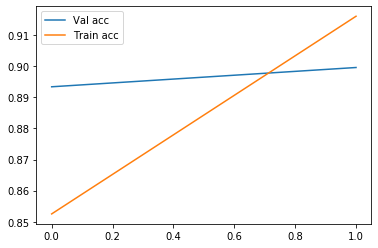

In [60]:
plt.plot(result['val_accuracy'], label = "Val acc")
plt.plot(result['accuracy'], label = "Train acc")
plt.legend()
plt.show()

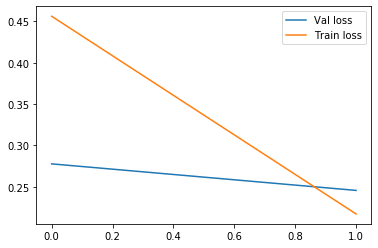

In [61]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

In [62]:
model.evaluate(x_val, y_val)

5000/5000 [==============================] - 4s 759us/step


[0.24572215604782105, 0.8996000289916992]

## Testing

In [63]:
test = pd.read_csv("Test.csv")

In [64]:
test.shape

(10000, 1)

In [65]:
test.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [66]:
test['clean_review'] = test['review'].apply(data_cleaning)

In [68]:
test.head()

,review,clean_review
0,Remember those old kung fu movies we used to w...,rememb old kung fu movi use watch friday satur...
1,This movie is another one on my List of Movies...,movi anoth one list movi bother saw year ago a...
2,How in the world does a thing like this get in...,world thing like get dvd player home even get ...
3,"""Queen of the Damned"" is one of the best vampi...",queen damn one best vampir movi ever seen movi...
4,The Caprica episode (S01E01) is well done as a...,caprica episod e well done pilot realli episod...


In [69]:
x_test = test['clean_review']

In [70]:
x_test = cv.transform(x_test)

In [71]:
x_test.shape

(10000, 50000)

In [72]:
x_test

<10000x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 911534 stored elements in Compressed Sparse Row format>

In [73]:
print(x_test[0])

  (0, 395)	1
  (0, 418)	1
  (0, 2035)	2
  (0, 3180)	1
  (0, 3615)	1
  (0, 3727)	1
  (0, 4699)	1
  (0, 5271)	2
  (0, 5280)	1
  (0, 5535)	1
  (0, 7293)	1
  (0, 7414)	1
  (0, 7680)	1
  (0, 7695)	1
  (0, 7768)	1
  (0, 7781)	1
  (0, 8214)	1
  (0, 8401)	1
  (0, 8762)	1
  (0, 10428)	1
  (0, 10432)	2
  (0, 10709)	1
  (0, 12231)	1
  (0, 12826)	1
  (0, 13086)	2
  :	:
  (0, 30404)	1
  (0, 30676)	1
  (0, 31188)	2
  (0, 31684)	2
  (0, 32747)	2
  (0, 32865)	1
  (0, 33213)	1
  (0, 33884)	1
  (0, 34997)	1
  (0, 35576)	1
  (0, 38580)	1
  (0, 39369)	2
  (0, 42101)	2
  (0, 42513)	2
  (0, 42577)	1
  (0, 44206)	1
  (0, 45940)	1
  (0, 46860)	1
  (0, 47362)	1
  (0, 47484)	1
  (0, 47563)	1
  (0, 47606)	2
  (0, 47743)	1
  (0, 48735)	1
  (0, 48790)	1


In [74]:
x_test = tfidf.transform(x_test)

In [75]:
print(x_test[0])

  (0, 48790)	0.07210043104578598
  (0, 48735)	0.046991459561053
  (0, 47743)	0.03987902018686199
  (0, 47606)	0.19961197058274957
  (0, 47563)	0.04304487843015688
  (0, 47484)	0.03628817562142445
  (0, 47362)	0.04705835054013717
  (0, 46860)	0.1652539755551365
  (0, 45940)	0.05172221425371514
  (0, 44206)	0.05582129902510553
  (0, 42577)	0.08349332635456788
  (0, 42513)	0.11102499199655104
  (0, 42101)	0.13701744088515666
  (0, 39369)	0.11085449717200527
  (0, 38580)	0.08940683552100609
  (0, 35576)	0.08766986770843334
  (0, 34997)	0.10599042982950457
  (0, 33884)	0.055974042428418275
  (0, 33213)	0.06697870436151282
  (0, 32865)	0.05874665839906521
  (0, 32747)	0.13093775621657786
  (0, 31684)	0.1550829138535876
  (0, 31188)	0.08995924238779994
  (0, 30676)	0.05157834269510663
  (0, 30404)	0.14584007163662122
  :	:
  (0, 13086)	0.13496278406655315
  (0, 12826)	0.1058185199777461
  (0, 12231)	0.0589908506208172
  (0, 10709)	0.08023949305955512
  (0, 10432)	0.17601695848894267
  (0, 104

In [76]:
y_pred = model.predict(x_test)

In [79]:
y_pred

array([[0.02845654],
       [0.04903705],
       [0.00257431],
       ...,
       [0.9889127 ],
       [0.9928219 ],
       [0.01517165]], dtype=float32)

In [80]:
y_pred>=0.5

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [81]:
y_pred[y_pred >= 0.5] = 1

In [82]:
y_pred = y_pred.astype('int')

In [83]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [85]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [86]:
dic = {0 : 'neg', 1 : 'pos'}

In [88]:
y_pred = [dic[p[0]] for p in y_pred]

In [89]:
y_pred

['neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


In [90]:
ids = np.arange(10000)

In [91]:
final_result = np.stack((ids, y_pred), axis = 1)

In [92]:
final_result

array([['0', 'neg'],
       ['1', 'neg'],
       ['2', 'neg'],
       ...,
       ['9997', 'pos'],
       ['9998', 'pos'],
       ['9999', 'neg']], dtype='<U11')

In [94]:
df = pd.DataFrame(final_result, columns=['Id', 'label'])

In [95]:
df.head()

,Id,label
0,0,neg
1,1,neg
2,2,neg
3,3,pos
4,4,pos


In [96]:
df.to_csv("y_pred.csv", index = False)